In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df = pd.read_csv('diabetes - diabetes.csv')
df.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1


In [ ]:
df.describe()

,Glucose,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,79.799479,31.992578,33.240885,0.348958
std,31.972618,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,0.000000,27.300000,24.000000,0.000000
50%,117.000000,30.500000,32.000000,29.000000,0.000000
75%,140.250000,127.250000,36.600000,41.000000,1.000000
max,199.000000,846.000000,67.100000,81.000000,1.000000


In [ ]:
df.isna().sum()

,0
Glucose,0
Insulin,0
BMI,0
Age,0
Outcome,0


In [ ]:
df.isnull().sum()

,0
Glucose,0
Insulin,0
BMI,0
Age,0
Outcome,0


#**EDA**

Feature Distribution

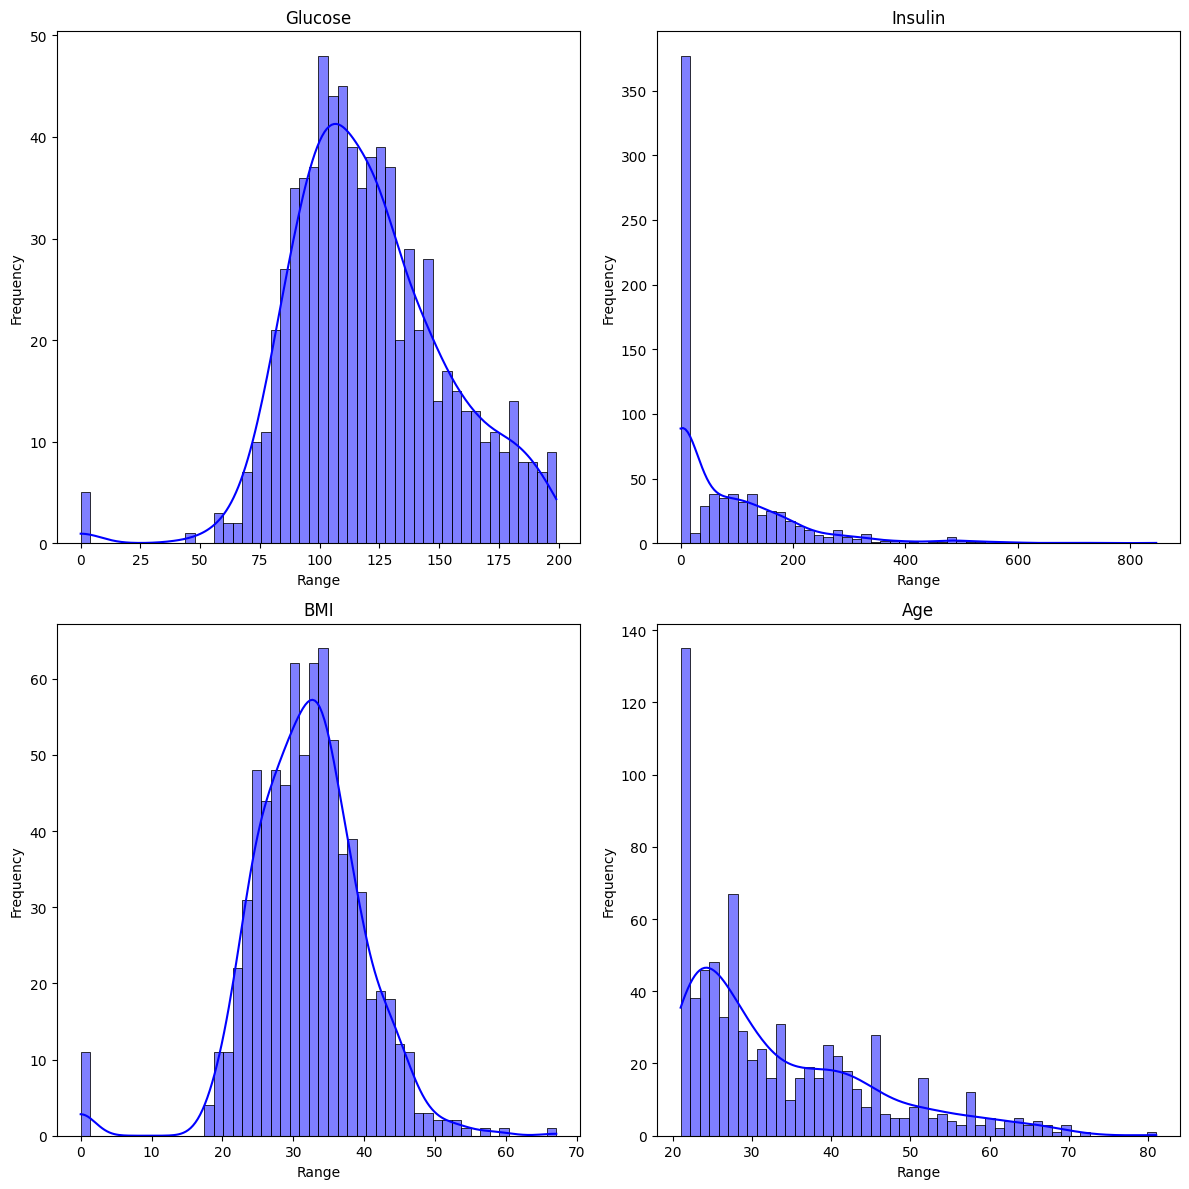

In [ ]:
num_features = ['Glucose', 'Insulin', 'BMI', 'Age']

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

for i, feature in enumerate(num_features):
  row, col = i // 2, i % 2

  sns.histplot(df[feature], ax=axes[row, col], bins=50, kde=True, color="blue", edgecolor="black")
  axes[row, col].set_title(feature)
  axes[row, col].set_xlabel('Range')
  axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#std_features = ['Glucose', 'BMI']
#log_features = ['Insulin', 'Age']

Outliers

In [ ]:
def handle_outlier(df, num_features):

  for column_name in num_features:
    #Winsorization
    # lower_limit = df[column_name].quantile(0.05)
    # upper_limit = df[column_name].quantile(0.95)

    # df[column_name] = np.where(df[column_name] < lower_limit, lower_limit, df[column_name])
    # df[column_name] = np.where(df[column_name] > upper_limit, upper_limit, df[column_name])

    #iqr
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

  return df

In [ ]:
df = handle_outlier(df, num_features)

Scaling

In [ ]:
# std_scaler = StandardScaler()
# df[std_feature] = std_scaler.fit_transform(df[std_feature])

# df[log_feature] = np.log1p(df[log_feature])
# df[log_feature] = std_scaler.fit_transform(df[log_feature])

std_scaler = StandardScaler()
df[num_features] = std_scaler.fit_transform(df[num_features])

df.head()

,Glucose,Insulin,BMI,Age,Outcome
0,0.938511,-0.803215,0.223929,1.546648,1
1,-1.180773,-0.803215,-0.854152,-0.172621,0
2,2.115891,-0.803215,-1.362390,-0.082133,1
3,-1.046215,0.369764,-0.623134,-1.077499,0
4,0.568478,1.293173,1.687040,0.008355,1


Class Distribution

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,466
1,238


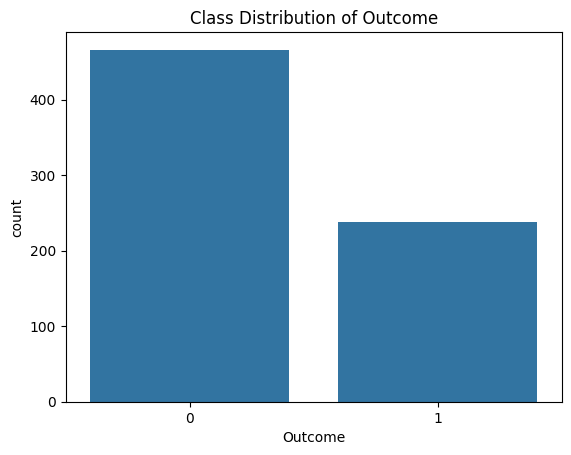

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution of Outcome')
plt.show()

correlation Heatmap

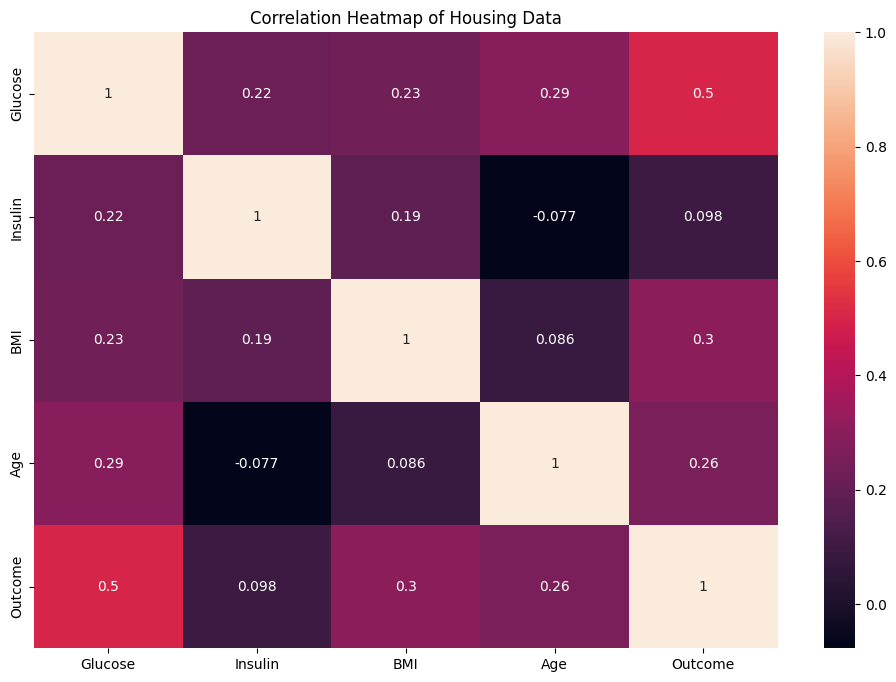

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,y_train)

GaussianNB()

#**Perceptron**

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        # Training loop
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # Calculate the linear combination (dot product) and add bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply the step activation function
                y_pred = self._activation(linear_output)

                # Update rule (only update if there's an error)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        # Calculate the linear combination and apply activation function
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self._activation(linear_output)
        return y_pred

    def _activation(self, x):
        # Step activation function
        return np.where(x >= 0, 1, 0)

    def score(self, X, y):
        """Calculates the accuracy of the model."""
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)  # Use accuracy_score for scoring

    def get_params(self, deep=True):
        """
        Get parameters for this estimator.
        """
        return {"learning_rate": self.learning_rate, "n_iter": self.n_iter}

    def set_params(self, **parameters):
        """
        Set the parameters of this estimator.
        """
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
perceptron_model = Perceptron(learning_rate=0.1, n_iter=10)
perceptron_model.fit(X_train.values, y_train.values)

#**Cross Validation**

In [ ]:
nb_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)  # GaussianNB
perceptron_scores = cross_val_score(perceptron_model, X_train.values, y_train.values, cv=5)  # Perceptron with scaling

print("Average CV score (GaussianNB):", nb_scores.mean())
print("Average CV score (Perceptron):", perceptron_scores.mean())

Average CV score (GaussianNB): 0.7620891276864727
Average CV score (Perceptron): 0.724841972187105


#**Comparision**

In [ ]:
y_pred_nb = naive_bayes_model.predict(X_test)
y_pred_perceptron = perceptron_model.predict(X_test)

In [ ]:
report_GaussianNB = classification_report(y_test, y_pred_nb, target_names=['No Diabetes', 'Diabetes'])
print(report_GaussianNB)

              precision    recall  f1-score   support

 No Diabetes       0.79      0.86      0.83        96
    Diabetes       0.64      0.51      0.57        45

    accuracy                           0.75       141
   macro avg       0.71      0.69      0.70       141
weighted avg       0.74      0.75      0.74       141



In [ ]:
report_perceptron = classification_report(y_test, y_pred_perceptron, target_names=['No Diabetes', 'Diabetes'])
print(report_perceptron)

              precision    recall  f1-score   support

 No Diabetes       0.86      0.82      0.84        96
    Diabetes       0.65      0.71      0.68        45

    accuracy                           0.79       141
   macro avg       0.76      0.77      0.76       141
weighted avg       0.79      0.79      0.79       141



#**Saving Models**

In [ ]:
with open('naive_bayes_model.pkl', 'wb') as nb_file:
    pickle.dump(naive_bayes_model, nb_file)

with open('perceptron_model.pkl', 'wb') as perceptron_file:
    pickle.dump(perceptron_model, perceptron_file)

print("Models saved successfully.")

Models saved successfully.
